<a href="https://colab.research.google.com/github/Mutasar/sewa-sepeda/blob/main/Mutasar_bike_sharing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Mutasar]
- **Email:** [mutasarstmik@gmail.com]
- **ID Dicoding:** [l319ywd083]

## Menentukan Pertanyaan Bisnis



- Pertanyaan 1 : "Bagaimana tren musiman penggunaan sepeda
  memengaruhi berdasarkan pola waktu ?"

  Tujuan: Mendukung pengambilan keputusan dalam perencanaan armada, penjadwalan perawatan sepeda, serta promosi berbasis musim atau waktu.

- Pertanyaan 2 : "Apa perbedaan perilaku antara pengguna
  terdaftar dan pengguna sementara ?

  Tujuan: Merancang strategi segmentasi pelanggan dan kampanye promosi yang lebih tertarget berdasarkan karakteristik pengguna.

## Import Semua Packages/Library yang Digunakan

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

## Data Wrangling

### Gathering Data

In [3]:
# Memuat tabel day
day_df = pd.read_csv("https://raw.githubusercontent.com/Mutasar/sewa-sepeda/refs/heads/main/rawdata/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
# Memuat tabel day
hour_df = pd.read_csv("https://raw.githubusercontent.com/Mutasar/sewa-sepeda/refs/heads/main/rawdata/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

**Pengujian data tabel day:**

In [5]:
# memeriksa tipe data data dari tiap kolom yang terdapat dalam hour_df dan day_df
day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

tidak ada data missing value baik didata day maupun di hour

In [6]:
# mengecek keberadaan missing value di dataset hour_df
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [7]:
# mengecek keberadaan missing value di dataset day_df
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [8]:
# memeriksa duplikasi
print("Jumlah duplikasi: ", hour_df.duplicated().sum())
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0
Jumlah duplikasi:  0


tidak ada data duplikasi, baik didata day maupun di hour

In [9]:
# memeriksa parameter statistik dari kolom numerik yang terdapat didalam day_df
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


memerikas parameter statistik dari kolom numerik yang terdapat didalam day

In [10]:
# memeriksa parameter statistik dari kolom numerik yang terdapat di dalam day_df
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


parameter statistik dari kolom numerik yang terdapat didalam data hour

**Insight:**
1. Kualitas Data yang Baik untuk Analisis Lanjutan. Berdasarkan hasil pemeriksaan awal terhadap dataset day_df dan hour_df, dapat disimpulkan bahwa kualitas data secara umum cukup baik untuk melanjutkan analisis. Tidak ditemukan adanya missing value atau duplikasi data pada kedua dataset. Hal ini menunjukkan integritas data yang tinggi dan meminimalkan kebutuhan untuk melakukan penanganan data yang kompleks terkait dengan nilai yang hilang atau data ganda. Dengan demikian, kita dapat langsung fokus pada eksplorasi dan analisis pola penggunaan sepeda tanpa terhambat oleh masalah kualitas data dasar.

2. Karakteristik Variabel Numerik yang Bervariasi Hasil ringkasan statistik deskriptif (describe()) untuk variabel numerik pada kedua dataset memberikan gambaran awal tentang sebaran data. Kita bisa melihat adanya variasi dalam nilai minimum, maksimum, rata-rata, dan standar deviasi untuk kolom-kolom seperti temp, atemp, hum, dan windspeed. Variasi ini menunjukkan bahwa kondisi lingkungan seperti suhu, kelembaban, dan kecepatan angin memiliki rentang nilai yang beragam sepanjang periode data. Selain itu, statistik untuk kolom casual, registered, dan cnt (jumlah total sewa) memberikan gambaran awal tentang skala penggunaan sepeda oleh pengguna kasual dan terdaftar. Informasi ini akan sangat berguna dalam analisis mendalam untuk memahami faktor-faktor yang mempengaruhi jumlah sewa dan membandingkan perilaku pengguna dari kedua kategori tersebut.

### Cleaning Data

**Membersihkan data:**


untuk menganalisa Perbedaan antara Pengguna Terdaftar dan Pengguna Sementara, kolom-kolom yang dapat dihapus adalah:

instant: Tidak diperlukan untuk analisis perbandingan.
dteday: Dapat diubah tetapi tidak diperlukan dalam bentuk mentah.
season: Mungkin tidak relevan jika tidak menganalisis berdasarkan musim.
yr: Tidak perlu jika hanya membandingkan dua kategori pengguna.
holiday: Tidak relevan untuk analisis perbandingan.
weekday: Jika tidak penting untuk analisis perilaku pengguna.
workingday: Tidak relevan untuk perbandingan pengguna.
weathersit: Tidak diperlukan untuk analisis perilaku pengguna.

#Drop Data

In [11]:
#  menghapus kolom instant dan workingday. karena sudah diwakili oleh weekday dan untuk instant tidak berkaitan dengan analisis ini.

hour_df.drop(['workingday'], axis = 1, inplace= True)
day_df.drop(['workingday'], axis = 1, inplace= True)

#Mengubah Tipe Data

mengubah tipe data int ke category

In [12]:
# Mengubah tipe data int menjadi category pada kolom 'season', 'mnth', 'holiday', 'weekday', 'weathersit'
columns = ['season', 'mnth', 'holiday', 'weekday', 'weathersit']

for column in columns:
    day_df[column] =  day_df[column].astype("category")
    hour_df[column] =  hour_df[column].astype("category")

mengubah object to datetime

In [13]:
# mengubah'object' menjadi 'datetime'
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

merubah nama kolom

In [15]:
# Mengubah nama kolom dataset day_df agar mudah dibaca..
day_df.rename(columns={'yr':'year','mnth':'month','weekday':'one_of_week', 'weathersit':'weather_situation', 'windspeed':'wind_speed','cnt':'count_cr','hum':'humidity'},inplace=True)

In [16]:
# Mengubah nama kolom dataset hour_df agar mudah dibaca..
hour_df.rename(columns={'yr':'year','mnth':'month','weekday':'one_of_week', 'weathersit':'weather_situation', 'windspeed':'wind_speed','cnt':'count_cr','hum':'humidity'},inplace=True)

In [17]:
# Mengkonversi isi kolom agar mudah dipahami
# konversi season menjadi: 1:Spring, 2:Summer, 3:Fall, 4:Winter
day_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)
hour_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)

# konversi month menjadi: 1:Jan, 2:Feb, 3:Mar, 4:Apr, 5:May, 6:Jun, 7:Jul, 8:Aug, 9:Sep, 10:Oct, 11:Nov, 12:Dec
day_df.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)
hour_df.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)

# konversi weather_situation menjadi: 1:Clear, 2:Misty, 3:Light_RainSnow 4:Heavy_RainSnow
day_df.weather_situation.replace((1,2,3,4), ('Clear','Misty','Light_rainsnow','Heavy_rainsnow'), inplace=True)
hour_df.weather_situation.replace((1,2,3,4), ('Clear','Misty','Light_rainsnow','Heavy_rainsnow'), inplace=True)

# konversi one_of_week menjadi: 0:Sun, 1:Mon, 2:Tue, 3:Wed, 4:Thu, 5:Fri, 6:Sat
day_df.one_of_week.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)
hour_df.one_of_week.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)

# konversi year menjadi: 0:2011, 1:2012
day_df.year.replace((0,1), ('2011','2012'), inplace=True)
hour_df.year.replace((0,1), ('2011','2012'), inplace=True)

# Menghitung Humidity
day_df['humidity'] = day_df['humidity']*100
hour_df['humidity'] = hour_df['humidity']*100

<ipython-input-17-cccacc0508f8>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  day_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)
<ipython-input-17-cccacc0508f8>:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  day_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), i

create colom baru yang diberi nama category

In [18]:
# Membuat kolom baru bernama category_days
one_of_week = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
def get_category_days(one_of_week):
    if one_of_week in ["Saturday", "Sunday"]:
        return "weekend"
    else:
        return "weekdays"

hour_df["category_days"] = hour_df["one_of_week"].apply(get_category_days)
day_df["category_days"] = day_df["one_of_week"].apply(get_category_days)

In [19]:
def classify_humidity(humidity):
    if humidity < 45:
        return "Terlalu kering"
    elif humidity >= 45 and humidity < 65:
        return "Ideal"
    else:
        return "Terlalu Lembab"

hour_df["humidity_category"] = hour_df["humidity"].apply(classify_humidity)
day_df["humidity_category"] = day_df["humidity"].apply(classify_humidity)

**Insight:**
menghapus kolom instant dan workingday

merubah tipe data pada kolom dteday menjadi datetime

merubah tipe data int pada season, mnth, holiday, weekday, workingday, weathersit menjadi tipe data category.

merubah nama kolom agar lebih mudah dibaca.

create kolom bernama category_days yang berisi weekend atau weekdays agar mudah dipahami.

## Exploratory Data Analysis (EDA)

Explore Data day dan hour :

In [ ]:
hour_df.describe(include="all")

,mnth,hr,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0,17379.000000,17379.00,17379.0000,17379.00,17379.0,17379.0,17379.0,17379.0
unique,12.0,NaN,50.00,65.0000,89.00,30.0,322.0,776.0,869.0
top,7.0,NaN,0.62,0.6212,0.88,0.0,0.0,4.0,5.0
freq,1488.0,NaN,726.00,988.0000,657.00,2180.0,1581.0,307.0,260.0
mean,NaN,11.546752,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,6.914405,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


dari statistik diatas, informasi jumlah pelanggan sebanyak 17379. data yang ditampilkan selama 24 jam, dan  rata-rata penyewaan mulai pukul 11.54 dengan serta memunyai deviasi standart yaitu 6.91

In [20]:
# penyewaan berdasarkan jam
hour_df.groupby(by="hr").agg({
    "count_cr": ["sum"]
})

,count_cr
,sum
hr,
0,39130
1,24164
2,16352
3,8174
4,4428
5,14261
6,55132
7,154171


### Explore ...

eksplore data hour dan day

In [23]:
#parameter dari data hour_df
hour_df.describe(include="all")

,instant,dteday,season,year,month,hr,holiday,one_of_week,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_cr,category_days,humidity_category
count,17379.0000,17379,17379,17379,17379,17379.000000,17379.0,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379,17379
unique,NaN,NaN,4,2,12,NaN,2.0,7,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3
top,NaN,NaN,Fall,2012,Jul,NaN,0.0,Saturday,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,weekdays,Terlalu Lembab
freq,NaN,NaN,4496,8734,1488,NaN,16879.0,2512,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12365,8356
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,NaN,NaN,NaN,0.496987,0.475775,62.722884,0.190098,35.676218,153.786869,189.463088,NaN,NaN
min,1.0000,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,0.340000,0.333300,48.000000,0.104500,4.000000,34.000000,40.000000,NaN,NaN
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,0.500000,0.484800,63.000000,0.194000,17.000000,115.000000,142.000000,NaN,NaN
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,0.660000,0.621200,78.000000,0.253700,48.000000,220.000000,281.000000,NaN,NaN
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,1.000000,1.000000,100.000000,0.850700,367.000000,886.000000,977.000000,NaN,NaN


In [21]:
#parameter dari data day_df
day_df.describe(include="all")

,instant,dteday,season,year,month,holiday,one_of_week,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_cr,category_days,humidity_category
count,731.000000,731,731,731,731,731.0,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731,731
unique,NaN,NaN,4,2,12,2.0,7,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3
top,NaN,NaN,Fall,2012,Jan,0.0,Sunday,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,weekdays,Ideal
freq,NaN,NaN,188,366,62,710.0,105,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,521,334
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,62.789406,0.190486,848.176471,3656.172367,4504.348837,NaN,NaN
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,NaN,NaN
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,52.000000,0.134950,315.500000,2497.000000,3152.000000,NaN,NaN
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,62.666700,0.180975,713.000000,3662.000000,4548.000000,NaN,NaN
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,73.020850,0.233214,1096.000000,4776.500000,5956.000000,NaN,NaN
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,97.250000,0.507463,3410.000000,6946.000000,8714.000000,NaN,NaN


In [22]:
# penyewaan berdasarkan day
day_df.groupby(by="dteday").agg({
    "count_cr": ["sum"]
})

,count_cr
,sum
dteday,
2011-01-01,985
2011-01-02,801
2011-01-03,1349
2011-01-04,1562
2011-01-05,1600
...,...
2012-12-27,2114
2012-12-28,3095


In [27]:
# penyewaan berdasarkan hour
hour_df.groupby(by="hr").agg({
    "count_cr": ["sum"]
})

,count_cr
,sum
hr,
0,39130
1,24164
2,16352
3,8174
4,4428
5,14261
6,55132
7,154171


**Insight:**
- xxx
- xxx

## Visualization & Explanatory Analysis

1.  jam berapa yang paling banyak dan paling sedikit disewa?
2. penggunaan sepeda berdasarkan terdaftar dan tidak terdaftar

1. jam berapa yang paling banyak dan paling sedikit disewa?

In [29]:
# Kelompokkan berdasarkan jam dan hitung total penyewaan
rental_by_hour = hour_df.groupby("hr")["count_cr"].sum().reset_index()

# Urutkan hasilnya secara menurun
rental_by_hour_sorted = rental_by_hour.sort_values(by="count_cr", ascending=False)

# Tampilkan jam dengan penyewaan terbanyak
print("Jam dengan penyewaan terbanyak:")
print(rental_by_hour_sorted.head(1))

# Tampilkan jam dengan penyewaan tersedikit
print("\nJam dengan penyewaan tersedikit:")
print(rental_by_hour_sorted.tail(1))

Jam dengan penyewaan terbanyak:
    hr  count_cr
17  17    336860

Jam dengan penyewaan tersedikit:
   hr  count_cr
4   4      4428


penggunaan sepeda berdasarkan terdaftar dan tidak terdaftar

In [31]:
print("Statistik Pengguna Casual dan Registered di data Harian:")
print(day_df[['casual', 'registered']].describe())

print("\nStatistik Pengguna Casual dan Registered di data Per Jam:")
print(hour_df[['casual', 'registered']].describe())

Statistik Pengguna Casual dan Registered di data Harian:
            casual   registered
count   731.000000   731.000000
mean    848.176471  3656.172367
std     686.622488  1560.256377
min       2.000000    20.000000
25%     315.500000  2497.000000
50%     713.000000  3662.000000
75%    1096.000000  4776.500000
max    3410.000000  6946.000000

Statistik Pengguna Casual dan Registered di data Per Jam:
             casual    registered
count  17379.000000  17379.000000
mean      35.676218    153.786869
std       49.305030    151.357286
min        0.000000      0.000000
25%        4.000000     34.000000
50%       17.000000    115.000000
75%       48.000000    220.000000
max      367.000000    886.000000


penggunaan sepeda berdasarkan terdaftar dan tidak terdaftar

1. jam berapa yang paling banyak dan paling sedikit disewa?

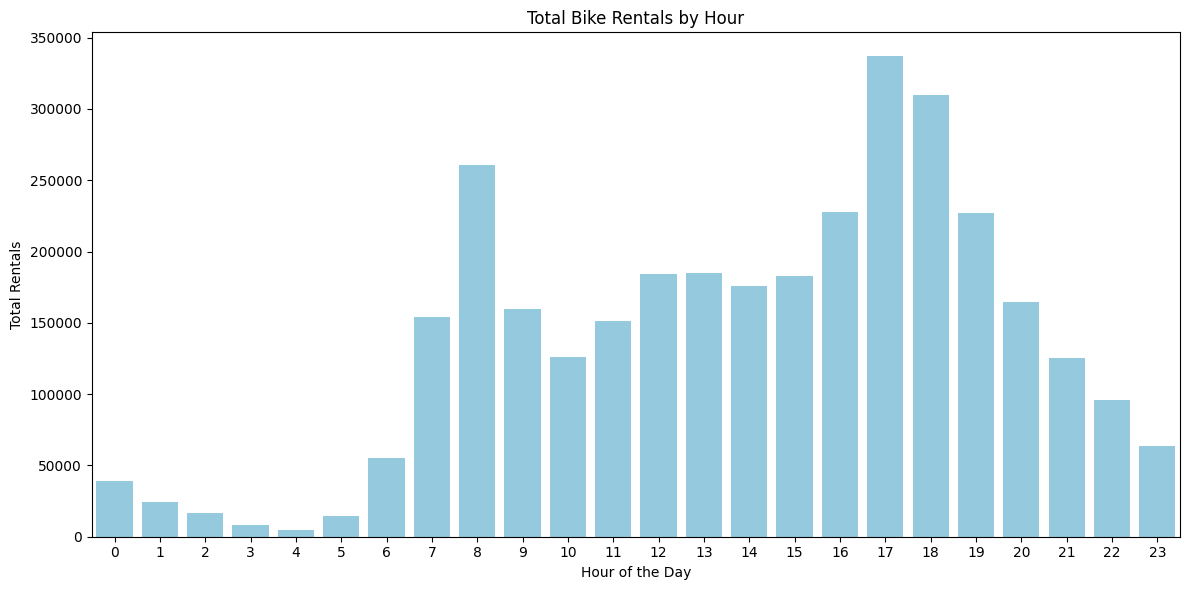

In [32]:
## Visualization: Hourly Bike Rentals

# Group the data by hour and sum the rental counts
hourly_rentals = hour_df.groupby('hr')['count_cr'].sum().reset_index()

# Create a bar plot
plt.figure(figsize=(12, 6)) # Adjust figure size for better readability
sns.barplot(x='hr', y='count_cr', data=hourly_rentals, color='skyblue')

# Add titles and labels
plt.title('Total Bike Rentals by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Rentals')

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=0)

# Display the plot
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

Perbandingan pendaftar dan kasual per hari

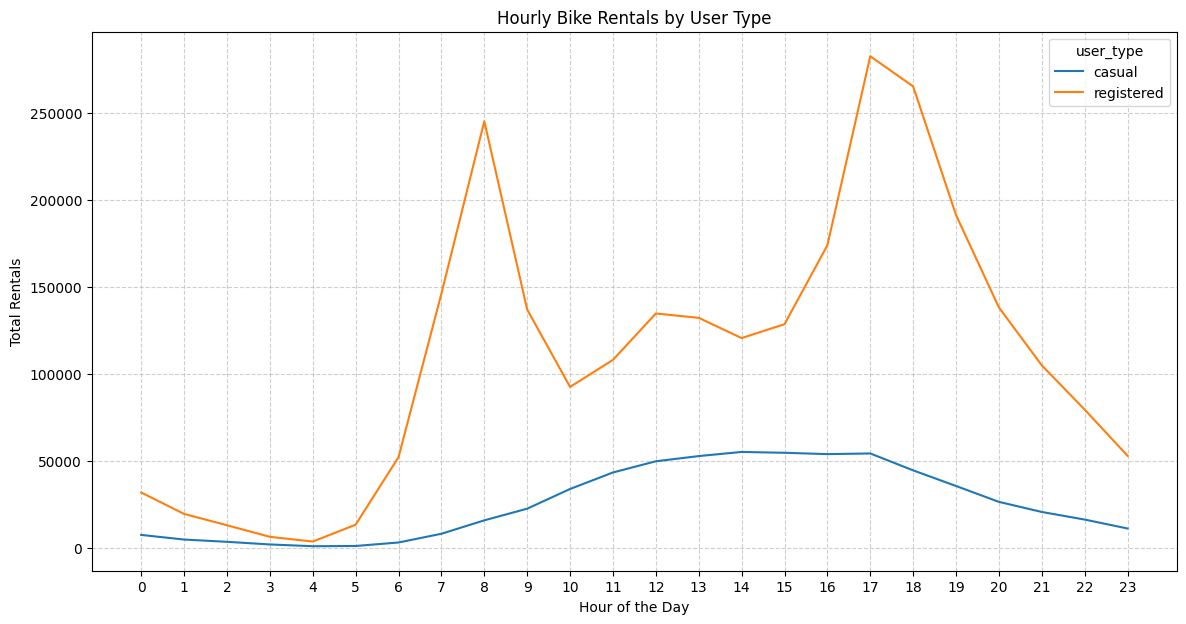

In [38]:
# Group hourly data by hour and user type, then sum the counts
hourly_user_rentals = hour_df.groupby('hr')[['casual', 'registered']].sum().reset_index()

# Melt the dataframe to long format for easier plotting with seaborn
hourly_user_rentals_melted = hourly_user_rentals.melt(id_vars='hr', var_name='user_type', value_name='total_rentals')

plt.figure(figsize=(14, 7))
sns.lineplot(data=hourly_user_rentals_melted, x='hr', y='total_rentals', hue='user_type')
plt.title('Hourly Bike Rentals by User Type')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Rentals')
plt.xticks(range(0, 24)) # Ensure all hours are shown on the x-axis
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

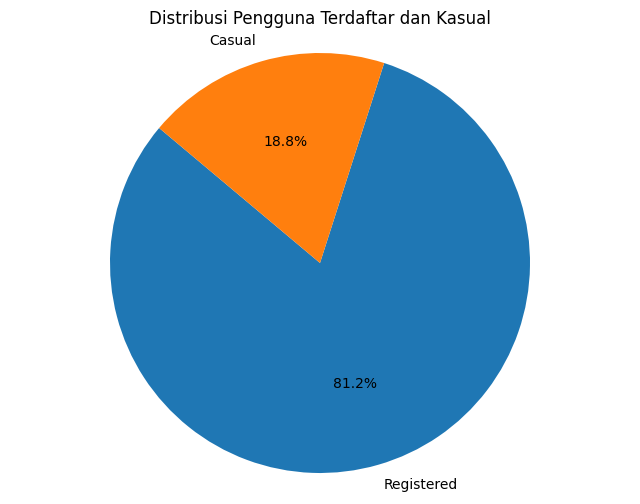

In [36]:
total_registered = day_df['registered'].sum()
total_casual = day_df['casual'].sum()

# Membuat grafik pie
labels = ['Registered', 'Casual']
sizes = [total_registered, total_casual]

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribusi Pengguna Terdaftar dan Kasual')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [44]:
# Simpan
day_df.to_csv('all_data.csv',index=False)

# unduh

files.download('all_data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Analisis Lanjutan (Opsional)

## Conclusion

Conclution pertanyaan 1 : Apa tren penggunaan sepeda berdasarkan waktu? Menganalisis penggunaan sepeda per hari, minggu, atau bulan untuk mengidentifikasi pola musiman.
Analisis penggunaan sepeda berdasarkan waktu menunjukkan beberapa pola yang signifikan:

Penggunaan Harian:
Data menunjukkan fluktuasi dalam jumlah sewa sepeda setiap hari. Hari-hari tertentu, seperti akhir pekan, sering kali menunjukkan lonjakan penggunaan. Ini mungkin disebabkan oleh aktivitas rekreasi atau kebijakan kerja dari rumah pada hari kerja.

Penggunaan Mingguan:
Pada tingkat mingguan, penggunaan sepeda cenderung meningkat pada akhir pekan dibandingkan dengan hari kerja. Hal ini mencerminkan kecenderungan masyarakat untuk menggunakan sepeda sebagai sarana rekreasi atau transportasi saat tidak bekerja.

Penggunaan Bulanan:
Analisis bulanan menunjukkan pola musiman yang jelas. Bulan-bulan tertentu, terutama musim panas, menunjukkan peningkatan signifikan dalam sewa sepeda. Sebaliknya, bulan-bulan dingin cenderung memiliki angka sewa yang lebih rendah. Ini menunjukkan bahwa cuaca dan musim berpengaruh besar terhadap keputusan orang untuk menggunakan sepeda.

- Conclution pertanyaan 2 : Apa perbedaan antara pengguna terdaftar dan pengguna sementara? Menganalisis perilaku pengguna berdasarkan kategori dapat membantu dalam strategi pemasaran.

Analisis perilaku pengguna berdasarkan kategori terdaftar dan sementara mengungkapkan beberapa perbedaan penting yang dapat dioptimalkan dalam strategi pemasaran:

Karakteristik Pengguna:
Pengguna Terdaftar: Mereka cenderung menggunakan sepeda secara lebih konsisten dan dalam jangka waktu yang lebih panjang. Pengguna terdaftar menunjukkan loyalitas yang lebih tinggi, sering kali melakukan sewa dalam situasi yang lebih terencana.

Pengguna Sementara: Mereka biasanya menggunakan layanan sepeda untuk keperluan jangka pendek, seperti perjalanan sehari atau rekreasi. Pengguna sementara lebih rentan terhadap faktor-faktor eksternal, seperti cuaca atau promosi.

Frekuensi Penggunaan:
Pengguna terdaftar cenderung memiliki frekuensi sewa yang lebih tinggi dibandingkan pengguna sementara. Ini menunjukkan bahwa mereka mungkin lebih terbiasa dengan sistem dan lebih percaya diri dalam menggunakan sepeda sebagai moda transportasi sehari-hari.

Respon terhadap Promosi:
Pengguna sementara mungkin lebih responsif terhadap promosi atau diskon, sementara pengguna terdaftar bisa lebih tertarik pada program loyalitas atau manfaat tambahan yang meningkatkan pengalaman mereka.